In [1]:
# Import python libraries

import numpy as np
import pandas as pd
import os
import re
import math

In [2]:
# Import dependencies

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import make_pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

## Data Cleanning

In [3]:
# dateparser = lambda x:pd.datetime.strptime(x, "%Y-%m-%d")

excel_dateparser = lambda x:pd.datetime.strptime(x, "%m/%d/%Y")

In [4]:
#Using date parser to separate main train & test and final train & test dataset

rNews=pd.read_csv('RedditNews.csv', encoding='latin-1')
dNews=pd.read_csv('Combined_News_DJIA.csv', encoding='latin-1', parse_dates = ['Date'],date_parser = excel_dateparser)
# dNews=pd.read_csv('Combined_News_DJIA.csv', encoding='latin-1', parse_dates = ['Date'],date_parser = dateparser)
dNews.head()

,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,...,Top16,Top17,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25
0,2008-08-08,0,"b""Georgia 'downs two Russian warplanes' as cou...",b'BREAKING: Musharraf to be impeached.',b'Russia Today: Columns of troops roll into So...,b'Russian tanks are moving towards the capital...,"b""Afghan children raped with 'impunity,' U.N. ...",b'150 Russian tanks have entered South Ossetia...,"b""Breaking: Georgia invades South Ossetia, Rus...","b""The 'enemy combatent' trials are nothing but...",...,b'Georgia Invades South Ossetia - if Russia ge...,b'Al-Qaeda Faces Islamist Backlash',"b'Condoleezza Rice: ""The US would not act to p...",b'This is a busy day: The European Union has ...,"b""Georgia will withdraw 1,000 soldiers from Ir...",b'Why the Pentagon Thinks Attacking Iran is a ...,b'Caucasus in crisis: Georgia invades South Os...,b'Indian shoe manufactory - And again in a se...,b'Visitors Suffering from Mental Illnesses Ban...,"b""No Help for Mexico's Kidnapping Surge"""
1,2008-08-11,1,b'Why wont America and Nato help us? If they w...,b'Bush puts foot down on Georgian conflict',"b""Jewish Georgian minister: Thanks to Israeli ...",b'Georgian army flees in disarray as Russians ...,"b""Olympic opening ceremony fireworks 'faked'""",b'What were the Mossad with fraudulent New Zea...,b'Russia angered by Israeli military sale to G...,b'An American citizen living in S.Ossetia blam...,...,b'Israel and the US behind the Georgian aggres...,"b'""Do not believe TV, neither Russian nor Geor...",b'Riots are still going on in Montreal (Canada...,b'China to overtake US as largest manufacturer',b'War in South Ossetia [PICS]',b'Israeli Physicians Group Condemns State Tort...,b' Russia has just beaten the United States ov...,b'Perhaps *the* question about the Georgia - R...,b'Russia is so much better at war',"b""So this is what it's come to: trading sex fo..."
2,2008-08-12,0,b'Remember that adorable 9-year-old who sang a...,"b""Russia 'ends Georgia operation'""","b'""If we had no sexual harassment we would hav...","b""Al-Qa'eda is losing support in Iraq because ...",b'Ceasefire in Georgia: Putin Outmaneuvers the...,b'Why Microsoft and Intel tried to kill the XO...,b'Stratfor: The Russo-Georgian War and the Bal...,"b""I'm Trying to Get a Sense of This Whole Geor...",...,b'U.S. troops still in Georgia (did you know t...,b'Why Russias response to Georgia was right',"b'Gorbachev accuses U.S. of making a ""serious ...","b'Russia, Georgia, and NATO: Cold War Two'",b'Remember that adorable 62-year-old who led y...,b'War in Georgia: The Israeli connection',b'All signs point to the US encouraging Georgi...,b'Christopher King argues that the US and NATO...,b'America: The New Mexico?',"b""BBC NEWS | Asia-Pacific | Extinction 'by man..."
3,2008-08-13,0,b' U.S. refuses Israel weapons to attack Iran:...,"b""When the president ordered to attack Tskhinv...",b' Israel clears troops who killed Reuters cam...,b'Britain\'s policy of being tough on drugs is...,b'Body of 14 year old found in trunk; Latest (...,b'China has moved 10 *million* quake survivors...,"b""Bush announces Operation Get All Up In Russi...",b'Russian forces sink Georgian ships ',...,b'Elephants extinct by 2020?',b'US humanitarian missions soon in Georgia - i...,"b""Georgia's DDOS came from US sources""","b'Russian convoy heads into Georgia, violating...",b'Israeli defence minister: US against strike ...,b'Gorbachev: We Had No Choice',b'Witness: Russian forces head towards Tbilisi...,b' Quarter of Russians blame U.S. for conflict...,b'Georgian president says US military will ta...,b'2006: Nobel laureate Aleksander Solzhenitsyn...
4,2008-08-14,1,b'All the experts admit that we should legalis...,b'War in South Osetia - 89 pictures made by a ...,b'Swedish wrestler Ara Abrahamian throws away ...,b'Russia exaggerated the death toll in South O...,b'Missile That Killed 9 Inside Pakistan May Ha...,"b""Rushdie Condemns Random House's Refusal to P...",b'Poland and US agree 

In [5]:
# Using preprocessor to process the text

def preprocessor(text):
    text = (re.sub('[\W]+',' ', text.lower() + ''))
    text = re.sub("b ",' ',text)
    return text

In [6]:
# Apply the preprocessor to all news articles

dNews['Top1'] = dNews['Top1'].apply(preprocessor)
dNews['Top2'] = dNews['Top2'].apply(preprocessor)
dNews['Top3'] = dNews['Top3'].apply(preprocessor)
dNews['Top4'] = dNews['Top4'].apply(preprocessor)
dNews['Top5'] = dNews['Top5'].apply(preprocessor)
dNews['Top6'] = dNews['Top6'].apply(preprocessor)
dNews['Top7'] = dNews['Top7'].apply(preprocessor)
dNews['Top8'] = dNews['Top8'].apply(preprocessor)
dNews['Top9'] = dNews['Top9'].apply(preprocessor)
dNews['Top10'] = dNews['Top10'].apply(preprocessor)
dNews['Top11'] = dNews['Top11'].apply(preprocessor)
dNews['Top12'] = dNews['Top12'].apply(preprocessor)

dNews['Top13'] = dNews['Top13'].apply(preprocessor)
dNews['Top14'] = dNews['Top14'].apply(preprocessor)
dNews['Top15'] = dNews['Top15'].apply(preprocessor)
dNews['Top16'] = dNews['Top16'].apply(preprocessor)
dNews['Top17'] = dNews['Top17'].apply(preprocessor)
dNews['Top18'] = dNews['Top18'].apply(preprocessor)
dNews['Top19'] = dNews['Top19'].apply(preprocessor)
dNews['Top20'] = dNews['Top20'].apply(preprocessor)
dNews['Top21'] = dNews['Top21'].apply(preprocessor)
dNews['Top22'] = dNews['Top22'].apply(preprocessor)
# ----------------------------------------------------------
#x=dNews['Top23'].dropna()
dNews['Top23'] = dNews['Top23'].fillna(method='ffill')
dNews['Top24'] = dNews['Top24'].fillna(method='ffill')
dNews['Top25'] = dNews['Top25'].fillna(method='ffill')
#len(dNews['Top23'])

dNews['Top23'] = dNews['Top23'].apply(preprocessor)
dNews['Top24'] = dNews['Top24'].apply(preprocessor)
dNews['Top25'] = dNews['Top25'].apply(preprocessor)


In [7]:
# Making the separation for last round of test (the final month)
# Apply this after you have vectorized the entire data set....
#. indexing on the basis index select - which rows will be part of the test
#. or split-train, and radomize
#. or build a function to filter the columns....

end_date = '2016-06-24'
start_date = '2016-03-24'
mask = (dNews['Date'] > start_date) & (dNews['Date'] <= end_date)
final_test_df = dNews.loc[mask]
dNews = dNews.loc[~mask]

In [8]:
# X_train = dNews.loc[:1000,"Top1"].values

X1 = dNews.loc[:,"Top1"].values
y1 = dNews.loc[:,"Label"].values
X2 = dNews.loc[:,"Top2"].values
y2 = dNews.loc[:,"Label"].values
X3 = dNews.loc[:,"Top3"].values
y3 = dNews.loc[:,"Label"].values
X4 = dNews.loc[:,"Top3"].values
y4 = dNews.loc[:,"Label"].values

X5 = dNews.loc[:,"Top5"].values
y5 = dNews.loc[:,"Label"].values
X6 = dNews.loc[:,"Top6"].values
y6 = dNews.loc[:,"Label"].values
X7 = dNews.loc[:,"Top7"].values
y7 = dNews.loc[:,"Label"].values
X8 = dNews.loc[:,"Top8"].values
y8 = dNews.loc[:,"Label"].values

X9 = dNews.loc[:,"Top9"].values
y9 = dNews.loc[:,"Label"].values
X10 = dNews.loc[:,"Top10"].values
y10 = dNews.loc[:,"Label"].values
X11 = dNews.loc[:,"Top11"].values
y11 = dNews.loc[:,"Label"].values
X12 = dNews.loc[:,"Top12"].values
y12 = dNews.loc[:,"Label"].values

#------------------------------------------

X13 = dNews.loc[:,"Top13"].values
y13 = dNews.loc[:,"Label"].values
X14 = dNews.loc[:,"Top14"].values
y14= dNews.loc[:,"Label"].values
X15= dNews.loc[:,"Top15"].values
y15= dNews.loc[:,"Label"].values
X16= dNews.loc[:,"Top16"].values
y16= dNews.loc[:,"Label"].values

X17 = dNews.loc[:,"Top17"].values
y17 = dNews.loc[:,"Label"].values
X18 = dNews.loc[:,"Top18"].values
y18= dNews.loc[:,"Label"].values
X19= dNews.loc[:,"Top19"].values
y19= dNews.loc[:,"Label"].values
X20= dNews.loc[:,"Top20"].values
y20= dNews.loc[:,"Label"].values

X21 = dNews.loc[:,"Top21"].values
y21 = dNews.loc[:,"Label"].values
X22 = dNews.loc[:,"Top22"].values
y22= dNews.loc[:,"Label"].values
X23= dNews.loc[:,"Top23"].values
y23= dNews.loc[:,"Label"].values
X24= dNews.loc[:,"Top24"].values
y24= dNews.loc[:,"Label"].values
X25= dNews.loc[:,"Top25"].values
y25= dNews.loc[:,"Label"].values



X = np.concatenate((X1, X2, X3, X4, X5, X6, X7, X8, X9, X10, X11,
                    X12, X13, X14, X15, X16, X17, X18, X19, X20, X21, X22, X23, X24, X25))
y = np.concatenate((y1, y2, y3, y4, y5, y6, y7, y8, y9, y10, y11,
                    y12, y13, y14, y15, y16, y17, y18, y19, y20, y21, y22, y23, y24, y25))

# 0.56 to 0.58, when we went from first 3 to Top 12
# print(X.shape)
# print(y.shape)

## Apply Regression Model

In [9]:
# Train and test the models using sklearn

vectorizer = CountVectorizer(ngram_range=(2,3), stop_words = 'english')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)
X_train=vectorizer.fit_transform(X_train)
X_test=vectorizer.transform(X_test)

In [10]:
# Using the linear regression model

from sklearn import linear_model
clf = linear_model.LogisticRegression()
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.5609147609147609

In [11]:
# Using the trainned model for final test dataset (from 2016-5-24 to 2016-6-24)

# X_train = dNews.loc[:1000,"Top1"].values

A1 = final_test_df.loc[:,"Top1"].values
B1 = final_test_df.loc[:,"Label"].values
A2 = final_test_df.loc[:,"Top2"].values
B2 = final_test_df.loc[:,"Label"].values
A3 = final_test_df.loc[:,"Top3"].values
B3 = final_test_df.loc[:,"Label"].values
A4 = final_test_df.loc[:,"Top3"].values
B4 = final_test_df.loc[:,"Label"].values

A5 = final_test_df.loc[:,"Top5"].values
B5 = final_test_df.loc[:,"Label"].values
A6 = final_test_df.loc[:,"Top6"].values
B6 = final_test_df.loc[:,"Label"].values
A7 = final_test_df.loc[:,"Top7"].values
B7 = final_test_df.loc[:,"Label"].values
A8 = final_test_df.loc[:,"Top8"].values
B8 = final_test_df.loc[:,"Label"].values

A9 = final_test_df.loc[:,"Top9"].values
B9 = final_test_df.loc[:,"Label"].values
A10 = final_test_df.loc[:,"Top10"].values
B10 = final_test_df.loc[:,"Label"].values
A11 = final_test_df.loc[:,"Top11"].values
B11 = final_test_df.loc[:,"Label"].values
A12 = final_test_df.loc[:,"Top12"].values
B12 = final_test_df.loc[:,"Label"].values

#------------------------------------------

A13 = final_test_df.loc[:,"Top13"].values
B13 = final_test_df.loc[:,"Label"].values
A14 = final_test_df.loc[:,"Top14"].values
B14= final_test_df.loc[:,"Label"].values
A15= final_test_df.loc[:,"Top15"].values
B15= final_test_df.loc[:,"Label"].values
A16= final_test_df.loc[:,"Top16"].values
B16= final_test_df.loc[:,"Label"].values

A17 = final_test_df.loc[:,"Top17"].values
B17 = final_test_df.loc[:,"Label"].values
A18 = final_test_df.loc[:,"Top18"].values
B18= final_test_df.loc[:,"Label"].values
A19= final_test_df.loc[:,"Top19"].values
B19= final_test_df.loc[:,"Label"].values
A20= final_test_df.loc[:,"Top20"].values
B20= final_test_df.loc[:,"Label"].values

A21 = final_test_df.loc[:,"Top21"].values
B21 = final_test_df.loc[:,"Label"].values
A22 = final_test_df.loc[:,"Top22"].values
B22= final_test_df.loc[:,"Label"].values
A23= final_test_df.loc[:,"Top23"].values
B23= final_test_df.loc[:,"Label"].values
A24= final_test_df.loc[:,"Top24"].values
B24= final_test_df.loc[:,"Label"].values
A25= final_test_df.loc[:,"Top25"].values
B25= final_test_df.loc[:,"Label"].values



final_X_test = np.concatenate((A1, A2, A3, A4, A5, A6, A7, A8, A9, A10, A11,
                    A12, A13, A14, A15, A16, A17, A18, A19, A20, A21, A22, A23, A24, A25))
final_y_test = np.concatenate((B1, B2, B3, B4, B5, B6, B7, B8, B9, B10, B11,
                    B12, B13, B14, B15, B16, B17, B18, B19, B20, B21, B22, B23, B24, B25))


# 0.56 to 0.58, when we went from first 3 to Top 12
# print(X.shape)
# print(y.shape)

#final_X_test = final_test_df.loc[:,"Top1"].values
#final_X_train = dNews.loc[:,"Top1"].values
#final_y_test = final_test_df.loc[:,"Label"].values
#final_y_train = dNews.loc[:,"Label"].values

In [12]:
# Score new data with trained model 

final_X_test_transform=vectorizer.transform(final_X_test)
clf.score(final_X_test_transform, final_y_test)

0.511875

In [13]:
final_X_test_transform.shape

(1600, 667978)

In [14]:
meta_predicted_value = clf.predict(final_X_test_transform)


def listsum(list):
    ret=0
    for i in list:
        ret += i
    return ret

#split the arr into N chunks
def chunks(arr, m):
    n = int(math.ceil(len(arr) / float(m)))
    return [arr[i:i + n] for i in range(0, len(arr), n)]

meta_predicted_value

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [15]:
list = chunks(meta_predicted_value, 25)

sum_list = listsum(list)

confidence_list = []
predict_list = []
predict_word = []

for i in sum_list:
    if i < 16.67:
        predict_list.append(-1)
        confidence_list.append(f'Decrease with {(i/25)*100} % confidence')
    else:
        predict_list.append(1)
        confidence_list.append(f'Increase with {(i/25)*100} % confidence')


In [16]:
confidence_list

['Decrease with 64.0 % confidence',
 'Decrease with 60.0 % confidence',
 'Increase with 88.0 % confidence',
 'Increase with 72.0 % confidence',
 'Increase with 72.0 % confidence',
 'Increase with 80.0 % confidence',
 'Increase with 84.0 % confidence',
 'Increase with 92.0 % confidence',
 'Decrease with 60.0 % confidence',
 'Increase with 80.0 % confidence',
 'Increase with 72.0 % confidence',
 'Increase with 68.0 % confidence',
 'Increase with 76.0 % confidence',
 'Increase with 84.0 % confidence',
 'Decrease with 56.00000000000001 % confidence',
 'Increase with 84.0 % confidence',
 'Decrease with 60.0 % confidence',
 'Increase with 72.0 % confidence',
 'Increase with 80.0 % confidence',
 'Increase with 84.0 % confidence',
 'Increase with 68.0 % confidence',
 'Increase with 84.0 % confidence',
 'Increase with 76.0 % confidence',
 'Increase with 76.0 % confidence',
 'Increase with 76.0 % confidence',
 'Increase with 68.0 % confidence',
 'Decrease with 64.0 % confidence',
 'Decrease with

In [17]:
# Instead of using 0 and 1 for decrease and increase, we decided to substitute 0 with -1

final_test_df['predicted_label'] = predict_list
final_test_df['Confidence']= confidence_list
final_test_df['Label'] = final_test_df['Label'].replace(0,-1)
final_test_df['predicted_label'] = final_test_df['predicted_label'].replace(0,-1)


In [18]:
# Getting cumulative values from the actual scores to mimic similar stock patterns.

sum_list = []
sum = final_test_df['Label'].iloc[0]

for i in final_test_df['Label']:
    sum = sum + i
    sum_list.append(sum)

final_test_df['cum_actual'] = sum_list

In [19]:
# Getting cumulative values from the predicted scores to mimic similar stock patterns.

predicted_y_axis = final_test_df['predicted_label'] 

cum_predict_list = []
sum_predict = predicted_y_axis.iloc[0]

for i in predicted_y_axis:
    sum_predict = sum_predict + i
    cum_predict_list.append(sum_predict)
    
final_test_df['cum_predict'] = cum_predict_list


## Visualize Results Using Line Chart

In [20]:
# Preparation step for cumulative line chart 

cum_y_actual = final_test_df['cum_actual'] 
cum_y_predict = final_test_df['cum_predict']
cum_x_axis = final_test_df['Date']
final_test_df

,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,...,Top20,Top21,Top22,Top23,Top24,Top25,predicted_label,Confidence,cum_actual,cum_predict
1920,2016-03-28,1,an aerial survey of the northern great barrier...,top medical experts say we should decriminaliz...,japan loses contact with new space telescope,saudi arabia cracks down on peaceful dissent s...,saudi arabia doesn t need elections even thoug...,most british workers are spending longer at th...,turkey is deliberately unleashing isis terrori...,palmyra ruins mostly intact syria antiquities ...,...,another nation trims meat from diet advice the...,nsa director made secret visit to israel last ...,dutch arrest frenchman suspected in planning a...,taliban faction says carried out suicide bom a...,moldova thousands march for reunification with...,suspect arrested in honduran activist nelson g...,-1,Decrease with 64.0 % confidence,2,-2
1921,2016-03-29,1,egyptair domestic flight from alexandria to ca...,israel passes law to cap bankers salaries isra...,u 1bn poured so rapidly into malaysian pm s pe...,many millions of muslims fundamentally incompa...,isis planning imminent attack on jewish school...,north korea tells citizens to prepare themselv...,canada has imposed sanctions on north korea,palestinian fabricated jewish terror attack no...,...,north korea fires another missile just as obam...,turkey summoned german ambassador over satiric...,saudi economy shows deepening signs of strain ...,arctic sea ice sets wintertime record low than...,isis executes 12 of its members relatives over...,brussels attacks fight the westerners text sen...,-1,Decrease with 60.0 % confidence,3,-3
1922,2016-03-30,1,hundreds of thousands of leaked emails reveal ...,using adblock plus to block ads is legal rules...,apple wants the fbi to reveal how it hacked th...,war on drugs has made no difference to number...,fracking triggers 90 of large quakes in wester...,turkey demands deletion of german video mockin...,90 of indigenous in brazil s amazon suffer mer...,satire spat germany tells turkey free speech n...,...,600 million worth smuggling operation nailed ...,obama administration to allow atlantic oil pro...,fbi warned dutch about el bakraoui brothers we...,several loud explosions followed by heavy gunf...,german prosecutor hard to convict islamic stat...,child labor rises sharply in gaza in the past ...,1,Increase with 88.0 % confidence,4,-2
1923,2016-03-31,-1,amnesty int has accused qatar of using forced ...,the fbi us department of justice and anti corr...,norway s integration minister we can t be like...,french minister compares veil wearers to negro...,pirate bay allowed to continue operating by sw...,isis forbids remaining christians from leaving...,government surveillance has chilling effect on...,a us based advocacy group says 98 girls in cen...,...,egyptair hijacker arrested in cyprus officials...,japanese regulators on wednesday approved the ...,global sea levels could rise by more than doub...,ex wife says egyptian hijacker abusive beat he...,north korean citizens told to get ready for fa...,uk plans to track all internet connections cou...,1,Increase with 72.0 % confidence,3,-1
1924,2016-04-01,1,reddit deletes surveillance warrant canary in ...,the headquarters of the monaco based oil compa...,daily nk reports north korea declares china an...,world s richest banker charged with bribery,rural canadians want the govt to fix their shi...,north korea has officially announced it is blo...,indonesian government threatens to deport leon...,discovery could rewrite history of vikings in ...,...,a man on the egypt air flight rang his wife to...,north korea jamming gps signals in south can a...,north korea nuclear tests us and china to co o...,china unveils proposal for 50 trillion for glo...,frustration erupts in three hour brawl between...,north korea fires another missile into sea,1,Increase with 72.0 % confidence,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,.

C:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


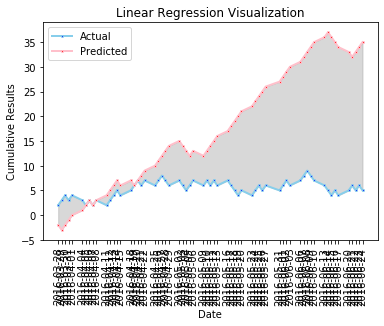

In [21]:
# Making the cumulative line chart for visualization & Showing the discrepancies  

plt.xlabel("Date")
plt.ylabel("Cumulative Results")
plt.title("Linear Regression Visualization")

plt.plot(cum_x_axis, cum_y_actual, marker='o', markerfacecolor='blue', markersize=2, color='skyblue', linewidth=2, label = 'Actual')
plt.plot(cum_x_axis, cum_y_predict,  marker='o', markerfacecolor='red', markersize=2, color='pink', linewidth=2,label = 'Predicted')
plt.xticks(final_test_df['Date'], rotation = 'vertical')
plt.fill_between(cum_x_axis, cum_y_actual,cum_y_predict, color='grey', alpha='0.3')
plt.legend()
plt.savefig("resources/linear_regres_3months.png")

## Visualize Results Using Pie Chart

In [22]:
# Step 1 vectorize all the data withoiut filt
#  know the specific rows you take out
#. also filter by date - On pandas apply the date filter, which gives you those data point
#. grab the index numbers that was filtered outy, save it
#.  apply a for loop to the list of index, and for each index (exclude that entire row)
#  Then you have a clean Train data set
#. Apply the for-loop again to create the Test_data set....

# Preparation step for the pie chart 


final_test_df['dif'] = final_test_df['Label'] - final_test_df['predicted_label']
final_test_df


right = 0
wrong = 0

for value in final_test_df['dif']:
    if value == 0:
        right += 1
    else:
        wrong += 1


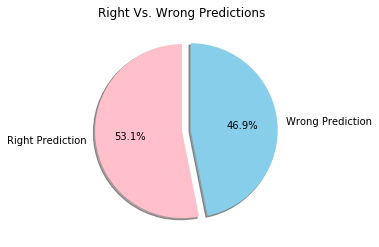

In [23]:
# Making the pie chart for visualization & Showing the right vs. wrong ratio  

plt.title("Right Vs. Wrong Predictions")
labels = ['Right Prediction', 'Wrong Prediction']
sizes = [right,wrong]
colors = ['pink','skyblue']
explode = (0,0.1)
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=90)
plt.savefig("resources/linear_ratio_3months.png")

In [31]:
vec_words = vectorizer.get_feature_names()
model_coef = clf.coef_.tolist()[0]
coef_df = pd.DataFrame({'word': vec_words,
                        'coef': model_coef})
top_coef_df = coef_df.sort_values(['coef', 'word'], ascending=[0, 1])
top_coef_df.tail(10)

,word,coef
26776,afghan woman,-0.806709
2002,10 million,-0.812471
640837,war iran,-0.826006
550080,sky news,-0.831203
266758,haiti earthquake,-0.834674
568792,stock market,-0.852969
572390,strike kills,-0.866004
521418,saudi king,-0.880223
664480,years old,-0.911945
76810,bin laden,-0.942619


## Offset By One Day

In [25]:
# Create Individual Offset Values
ind_offset = predict_list[:-1]

start = 1
ind_offset.insert(0,start)

final_test_df['ind_offset'] =ind_offset


In [26]:
# Getting cumulative values from the predicted scores to mimic similar stock patterns.
off_predicted_y_axis = final_test_df['ind_offset'] 

cum_off_list = []
sum_off_predict = off_predicted_y_axis.iloc[0]


for i in off_predicted_y_axis:
    sum_off_predict = sum_off_predict + i
    cum_off_list.append(sum_off_predict)
    
final_test_df['cum_off_predict'] = cum_off_list
final_test_df

,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,...,Top23,Top24,Top25,predicted_label,Confidence,cum_actual,cum_predict,dif,ind_offset,cum_off_predict
1920,2016-03-28,1,an aerial survey of the northern great barrier...,top medical experts say we should decriminaliz...,japan loses contact with new space telescope,saudi arabia cracks down on peaceful dissent s...,saudi arabia doesn t need elections even thoug...,most british workers are spending longer at th...,turkey is deliberately unleashing isis terrori...,palmyra ruins mostly intact syria antiquities ...,...,taliban faction says carried out suicide bom a...,moldova thousands march for reunification with...,suspect arrested in honduran activist nelson g...,-1,Decrease with 64.0 % confidence,2,-2,2,1,2
1921,2016-03-29,1,egyptair domestic flight from alexandria to ca...,israel passes law to cap bankers salaries isra...,u 1bn poured so rapidly into malaysian pm s pe...,many millions of muslims fundamentally incompa...,isis planning imminent attack on jewish school...,north korea tells citizens to prepare themselv...,canada has imposed sanctions on north korea,palestinian fabricated jewish terror attack no...,...,arctic sea ice sets wintertime record low than...,isis executes 12 of its members relatives over...,brussels attacks fight the westerners text sen...,-1,Decrease with 60.0 % confidence,3,-3,2,-1,1
1922,2016-03-30,1,hundreds of thousands of leaked emails reveal ...,using adblock plus to block ads is legal rules...,apple wants the fbi to reveal how it hacked th...,war on drugs has made no difference to number...,fracking triggers 90 of large quakes in wester...,turkey demands deletion of german video mockin...,90 of indigenous in brazil s amazon suffer mer...,satire spat germany tells turkey free speech n...,...,several loud explosions followed by heavy gunf...,german prosecutor hard to convict islamic stat...,child labor rises sharply in gaza in the past ...,1,Increase with 88.0 % confidence,4,-2,0,-1,0
1923,2016-03-31,-1,amnesty int has accused qatar of using forced ...,the fbi us department of justice and anti corr...,norway s integration minister we can t be like...,french minister compares veil wearers to negro...,pirate bay allowed to continue operating by sw...,isis forbids remaining christians from leaving...,government surveillance has chilling effect on...,a us based advocacy group says 98 girls in cen...,...,ex wife says egyptian hijacker abusive beat he...,north korean citizens told to get ready for fa...,uk plans to track all internet connections cou...,1,Increase with 72.0 % confidence,3,-1,-2,1,1
1924,2016-04-01,1,reddit deletes surveillance warrant canary in ...,the headquarters of the monaco based oil compa...,daily nk reports north korea declares china an...,world s richest banker charged with bribery,rural canadians want the govt to fix their shi...,north korea has officially announced it is blo...,indonesian government threatens to deport leon...,discovery could rewrite history of vikings in ...,...,china unveils proposal for 50 trillion for glo...,frustration erupts in three hour brawl between...,north korea fires another missile into sea,1,Increase with 72.0 % confidence,4,0,0,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1979,2016-06-20,1,a staggering 87 percent of venezuelans say the...,two corporate whistleblowers may enter into pl...,poland together with russia iran and several g...,three environmental activists were killed per ...,ontario funeral business dissolves the dead po...,new declassified documents reveal how cia abus...,tens of thousands of people gathered in swelte...,japan s dementia crisis hits record levels as ...,...,vladimir putin is considering selling part of ...,an elephant has survived being shot in the hea...,wikileaks founder julian assange marks 5 years...,-1,Decrease with 60.0 % confidence,5,33,2,-1,37
1980,2016-06-21,1,an australian athlete who has competed in six ...,russ

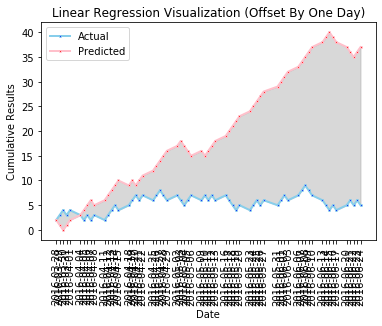

In [27]:
# Making the cumulative line chart for visualization & Showing the discrepancies  

plt.xlabel("Date")
plt.ylabel("Cumulative Results")
plt.title("Linear Regression Visualization (Offset By One Day)")

plt.plot(cum_x_axis, cum_y_actual, marker='o', markerfacecolor='blue', markersize=2, color='skyblue', linewidth=2, label = 'Actual')
plt.plot(cum_x_axis, cum_off_list,  marker='o', markerfacecolor='red', markersize=2, color='pink', linewidth=2,label = 'Predicted')
plt.xticks(final_test_df['Date'], rotation = 'vertical')
plt.fill_between(cum_x_axis, cum_y_actual,cum_off_list, color='grey', alpha='0.3')
plt.legend()
plt.savefig("resources/linear_offset_regres_3months.png")

In [28]:

final_test_df['offset_dif'] = final_test_df['Label'] - final_test_df['ind_offset']

off_right = 0
off_wrong = 0

for value in final_test_df['offset_dif']:
    if value == 0:
        off_right += 1
    else:
        off_wrong += 1


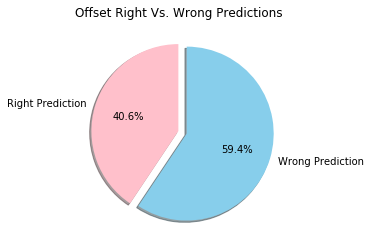

In [29]:
# Making the pie chart for visualization & Showing the right vs. wrong ratio  

plt.title("Offset Right Vs. Wrong Predictions")
labels = ['Right Prediction', 'Wrong Prediction']
sizes = [off_right,off_wrong]
colors = ['pink','skyblue']
explode = (0,0.1)
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=90)
plt.savefig("resources/linear_offset_ratio_3months.png")

In [30]:
comparison_df = final_test_df[['Label','predicted_label','ind_offset','cum_actual','cum_predict','cum_off_predict','dif','offset_dif']]
comparison_df

,Label,predicted_label,ind_offset,cum_actual,cum_predict,cum_off_predict,dif,offset_dif
1920,1,-1,1,2,-2,2,2,0
1921,1,-1,-1,3,-3,1,2,2
1922,1,1,-1,4,-2,0,0,2
1923,-1,1,1,3,-1,1,-2,-2
1924,1,1,1,4,0,2,0,0
...,...,...,...,...,...,...,...,...
1979,1,-1,-1,5,33,37,2,2
1980,1,-1,-1,6,32,36,2,2
1981,-1,1,-1,5,33,35,-2,0
1982,1,1,1,6,34,36,0,0
